# Part 2: Train Models on Reduced Feature List

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [35]:
def plot_confusion_regression(y_test, y_pred, quartiles=4):
    true_binned = pd.qcut(y_test, q=quartiles, precision=0)
    print("Y Test Binned Value Counts")
    display(true_binned.value_counts())

    pred_binned = pd.cut(y_pred, bins=true_binned.value_counts().index.to_list())
    print("Y Pred Binned Value Counts")
    display(pred_binned.value_counts())

    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cm = confusion_matrix(true_binned.astype(str), pred_binned.astype(str), labels=[str(x) for x in true_binned.value_counts().index.to_list()])

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(x) for x in true_binned.value_counts().index.to_list()])
    disp.plot()

In [2]:
ALPHA = 0.1
coefs_LASSO = pd.read_csv(f'LASSO_coef_alpha_{ALPHA}.csv', header=0, index_col=0)
coefs_LASSO

,Coefficients importance
CNTSCHID,0.000000
CNTSTUID,1.206891
OECD,1.299382
ADMINMODE,30.219161
Option_CT,-0.313555
...,...
PV1MCUD,8.802313
PV1MPEM,13.467939
PV1MPFS,7.822954
PV1MPIN,7.920692


In [3]:
X = pd.read_csv('cleaned_data/X_train.csv', header=0, index_col=0)
y = pd.read_csv('cleaned_data/y_train.csv', header=None, index_col=None).values.ravel()

X = X.filter(items=coefs_LASSO[coefs_LASSO["Coefficients importance"] != 0].index)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (200554, 413)
Shape of Test Features: (133704, 413)
Shape of Train Target: (200554,)
Shape of Test Target: (133704,)


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

pipe_lr = Pipeline([
        ('imputer', SimpleImputer(add_indicator=True)), 
        ('scaler', StandardScaler()), 
        ('lr', LinearRegression())
    ])

print("Linear Regression Model")
print("coefficient of determination of the prediction:", pipe_lr.fit(X_train, y_train).score(X_test, y_test))

# Calculate MSE and MAE
y_pred = pipe_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Report results
print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")

plot_confusion_regression(y_test, y_pred, quartiles=10)

Linear Regression Model
coefficient of determination of the prediction: 0.9081545826978901
Test MSE: 954.4643913754556
Test MAE: 24.117455971894806


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

pipe_rf = Pipeline([
        ('imputer', SimpleImputer(add_indicator=True)), 
        ('scaler', StandardScaler()), 
        ('rf', RandomForestRegressor(random_state=0, n_estimators=50, max_depth=20))
    ])

print("Random Forest Model")
print("mean accuracy:", pipe_rf.fit(X_train, y_train).score(X_test, y_test))

# Calculate MSE and MAE
y_pred = pipe_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Report results
print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")

plot_confusion_regression(y_test, y_pred, quartiles=10)

Random Forest Model
mean accuracy: 0.9083505730679547
Test MSE: 952.4276449075962
Test MAE: 24.32216694305959


Y Test Binned Value Counts


(88.0, 317.0]     13371
(317.0, 353.0]    13370
(353.0, 381.0]    13370
(381.0, 408.0]    13371
(408.0, 436.0]    13371
(436.0, 465.0]    13369
(465.0, 497.0]    13371
(497.0, 533.0]    13370
(533.0, 583.0]    13370
(583.0, 868.0]    13371
Name: count, dtype: int64

Y Pred Binned Value Counts


(88.0, 317.0]     11248
(317.0, 353.0]    14696
(353.0, 381.0]    13675
(381.0, 408.0]    13735
(408.0, 436.0]    13762
(436.0, 465.0]    13523
(465.0, 497.0]    13720
(497.0, 533.0]    13526
(533.0, 583.0]    13582
(583.0, 868.0]    12237
Name: count, dtype: int64

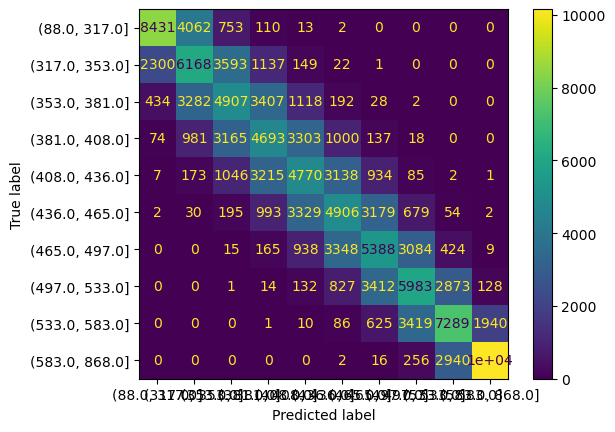

In [37]:
plot_confusion_regression(y_test, y_pred, quartiles=10)